In [4]:
import numpy as np
import os 
import shutil
import cv2
import matplotlib.pyplot as plt


In [5]:
os.makedirs("./pictures/training/dog", exist_ok=True)
os.makedirs("./pictures/training/cat", exist_ok=True)
os.makedirs("./pictures/validation/dog", exist_ok=True)
os.makedirs("./pictures/validation/cat", exist_ok=True)

all_pictures = os.listdir("./train")

cat_pictures = list(filter(lambda image: 'cat' in image, all_pictures))
dog_pictures = list(filter(lambda image: 'dog' in image, all_pictures))

In [6]:
len(cat_pictures)
len(dog_pictures)

12500

12500

In [7]:
validation_index = len(dog_pictures) - len(dog_pictures) * 0.2

#split into validation and training 

train_dogs = dog_pictures[:int(validation_index)]
validate_dogs = dog_pictures[int(validation_index):]

len(train_dogs)
len(validate_dogs)
train_cats = cat_pictures[:int(validation_index)]
validate_cats = cat_pictures[int(validation_index):]

len(train_cats)
len(validate_cats)


10000

2500

10000

2500

In [8]:
def copy_images_in_dir(picture, directory):
    for catordog in picture:
        shutil.copyfile(f'./train/{catordog}',f'./{directory}/{catordog}')

In [9]:
copy_images_in_dir(train_cats, './pictures/training/cat')
copy_images_in_dir(train_dogs, './pictures/training/dog')
copy_images_in_dir(validate_cats, './pictures/validation/cat')
copy_images_in_dir(validate_dogs, './pictures/validation/dog')

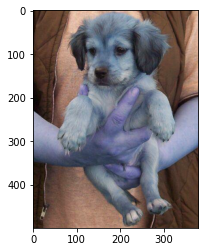

In [10]:
dir_train = "./pictures/training"
dir_validate = "./pictures/validation"



group = ["dog", "cat"];

for catordog in group:
    path = os.path.join(dir_train, catordog)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [17]:
picture_size = 100

training_data = []
validation_data = []

def create_training_data():
    for catordog in group:
        path = os.path.join(dir_train, catordog)
        group_num = group.index(catordog)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (picture_size, picture_size))
            training_data.append([new_array, group_num])

def create_validation_data():
    for catordog in group:
        path = os.path.join(dir_train, catordog)
        group_num = group.index(catordog)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (picture_size, picture_size))
            validation_data.append([new_array, group_num])

In [18]:
create_validation_data()
create_training_data()

In [20]:
#Import random
import random

random.shuffle(training_data)
random.shuffle(validation_data)

In [21]:
X_train = []
y_train = []

X_val = []
y_val = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

for features, label in validation_data:
    X_val.append(features)
    y_val.append(label)

X_train = np.array(X_train).reshape(-1, picture_size, picture_size, 3)
X_val = np.array(X_val).reshape(-1, picture_size, picture_size, 3)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [23]:
#Import der Tensorflow Pakete
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense

In [24]:
X_train = X_train/255.0
X_val = X_val/255.0

model = keras.Sequential([
    keras.layers.Conv2D(
        32,(3,3),activation='relu',input_shape= X_train.shape[1:]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
       64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
        128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
        256,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(
        512,(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
    ])

2021-11-05 13:21:28.161724: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0

In [26]:
cnn_model = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=8, batch_size=48)

Epoch 1/8
417/417 [==============================] - 295s 704ms/step - loss: 0.6875 - accuracy: 0.5321 - val_loss: 0.6487 - val_accuracy: 0.6258
Epoch 2/8
417/417 [==============================] - 210s 503ms/step - loss: 0.6339 - accuracy: 0.6408 - val_loss: 0.6157 - val_accuracy: 0.6518
Epoch 3/8
417/417 [==============================] - 216s 515ms/step - loss: 0.5652 - accuracy: 0.7086 - val_loss: 0.5701 - val_accuracy: 0.6841
Epoch 4/8
417/417 [==============================] - 208s 498ms/step - loss: 0.5016 - accuracy: 0.7552 - val_loss: 0.4245 - val_accuracy: 0.7997
Epoch 5/8
417/417 [==============================] - 223s 534ms/step - loss: 0.4481 - accuracy: 0.7898 - val_loss: 0.4189 - val_accuracy: 0.8048
Epoch 6/8
417/417 [==============================] - 209s 500ms/step - loss: 0.4090 - accuracy: 0.8143 - val_loss: 0.3352 - val_accuracy: 0.8535
Epoch 7/8
417/417 [==============================] - 193s 463ms/step - loss: 0.3729 - accuracy: 0.8328 - val_loss: 0.2883 - val_ac

In [27]:
model.save('CatsVsDogs-CNN.model')

2021-11-05 14:02:48.227252: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: CatsVsDogs-CNN.model/assets


[[0.]]


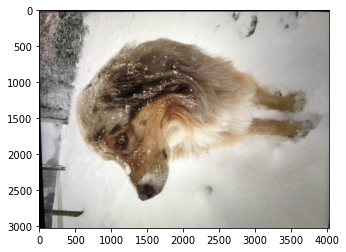

In [38]:
import matplotlib.pyplot as plt

def prepare(filepath):
    img_size = 100;
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (img_size, img_size));
    return new_array.reshape(-1, img_size, img_size, 3);

prediction = model.predict([prepare('IMG-0648.jpg')])

print(prediction)
img = mpimg.imread('IMG-0648.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
accuracy_evaluation = model.evaluate(X_val, y_val)

print ('val loss: ', accuracy_evaluation[0])
print ('val accuracy: ', accuracy_evaluation[1])

accuracy_evaluation_train = model.evaluate(X_train, y_train)

print ('train loss: ', accuracy_evaluation_train[0])
print ('train accuracy: ', accuracy_evaluation_train[1])

In [ ]:
accuracy = cnn_model.history['accuracy']
val_accuracy = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Erstellen der Grafik für Training und Validation Loss
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
plt.plot(cnn_model.history['accuracy'], label='accuracy')
plt.plot(cnn_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')